### <span style="color:purple; font-weight:bold;">Candidate Name: Anirban Bose</span>
<h3><strong style="color:purple;">Assignment Name:</strong> <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques" target="_blank">House Prices: Advanced Regression Techniques (Kaggle)</a></h3>
<h3><strong style="color:purple;">Task: Model Development and Training</strong></h3>


#### **I. Import the packages**

In [212]:
# Import the relevant packages. Kindly ensure that modules for these packages are already installed before using them (use pip install <module name>).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import json

In [213]:
# This package ensures the dataframes are displayed in scrollable manner

from IPython.display import display, HTML

#### **II. The ML Models**

##### <span style="color:blue; font-weight:bold;">Load the feature engineered data</span>

In [214]:
# Get base directory. 
base_dir = os.path.dirname(os.getcwd())
print("Base directory:", base_dir)

Base directory: c:\Users\4553620\OneDrive - Northwestern University\Self_Projects\Data_Science_Projects\Housing Prices_Kaggle


In [215]:
# Create intermediate directory
intermediate_dir = os.path.join(base_dir, "output", "intermediate")
print("Intermediate directory:", intermediate_dir)

Intermediate directory: c:\Users\4553620\OneDrive - Northwestern University\Self_Projects\Data_Science_Projects\Housing Prices_Kaggle\output\intermediate


In [216]:
# Import the column types
# Define path
json_path = os.path.join(intermediate_dir, "train_for_model_columns_dtypes.json")

# Load JSON
with open(json_path, "r") as f:
    train_for_model_columns_dtypes = json.load(f)


In [217]:
# Import the data. 

df_train_for_model  = pd.read_csv(os.path.join(intermediate_dir,"train_for_model.csv"), 
                                  dtype=train_for_model_columns_dtypes)

In [295]:
df_train_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Columns: 405 entries, Id to SaleCondition_Partial
dtypes: bool(364), float64(4), int32(1), int64(29), object(7)
memory usage: 977.7+ KB


##### <span style="color:blue; font-weight:bold;">Define the common functions</span>

In [218]:
# Import the packages

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

# Regression algorithms
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [219]:
# Function to evaluate the models

def evaluate_model(y_true, y_pred, dataset_name, algorithm_name, algorithm_seq):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    residuals = [true - pred for true, pred in zip(y_true, y_pred)]

    return {
        "Algorithm Sequence": algorithm_seq,
        "Algorithm Name": algorithm_name,
        "Dataset": dataset_name,
        "Y_True": y_true,
        "Y_Pred": y_pred,
        "Residuals": residuals,
        "MSE": mse,
        "RMSE": np.sqrt(mse),
        "MAE": mae,
        "R²": r2
    }

In [220]:
# Function to save the models

def save_model(algorithm_name, algorithm_seq, algorithm, scaler):
    return {
        "Algorithm Sequence": algorithm_seq,
        "Algorithm Name": algorithm_name,
        "Algorithm": algorithm,
        "Scaler": scaler
    }

In [221]:
# Create an empty list to hold the results of model evaluation performance
results_no_grid = []

In [222]:
# Create an empty list to hold the models
models_no_grid = []

##### <span style="color:blue; font-weight:bold;">Model 1: Linear Regression</span>

In [223]:
# Copy the train data ready for modelling

df_train_for_lr = df_train_for_model.copy()

In [224]:
# Get the X and y for the model creation considering SalePrice as dependent variable.

X_lr = df_train_for_lr.drop(['SalePrice', 'Log_SalePrice', 'Id'],axis=1)
y_lr = df_train_for_lr['SalePrice']

# Get the y_log for the model creation considering Log_SalePrice as dependent variable.

y_log_lr = df_train_for_lr['Log_SalePrice']

In [225]:
# Perform a 80-20 split

X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.20, random_state=42)

In [226]:
# Since the features have different scales, hence we need to use StandardScaler to normalize feature scale

standard_scaler_lr = StandardScaler()
standard_scaled_X_lr_train = standard_scaler_lr.fit_transform(X_lr_train)
standard_scaled_X_lr_test = standard_scaler_lr.transform(X_lr_test)

In [227]:

# Define the Linear Regression model
lr = LinearRegression()

In [228]:
# Train the model using the training data
lr.fit(standard_scaled_X_lr_train, y_lr_train)

LinearRegression()

In [229]:
# Predictions on train and test sets
y_lr_train_pred = lr.predict(standard_scaled_X_lr_train)
y_lr_test_pred = lr.predict(standard_scaled_X_lr_test)

In [230]:
# Evaluate the performance of the train and the test sets and save the model
algorithm_seq = 1
algorithm_name = "Linear Regression"
algorithm = lr
scaler = standard_scaler_lr

# Save the evaluations
results_no_grid.append(evaluate_model(y_lr_train, y_lr_train_pred, "Training Set", algorithm_name, algorithm_seq))
results_no_grid.append(evaluate_model(y_lr_test, y_lr_test_pred, "Test Set", algorithm_name, algorithm_seq))

# Save the model
models_no_grid.append(save_model(algorithm_name, algorithm_seq, algorithm, scaler))

In [231]:
results_no_grid

[{'Algorithm Sequence': 1,
  'Algorithm Name': 'Linear Regression',
  'Dataset': 'Training Set',
  'Y_True': 720     124500
  254     145000
  1063    178000
  636      85000
  1289    162900
           ...  
  1095    128000
  1130    239500
  1294    154000
  860     152000
  1126    140000
  Name: SalePrice, Length: 1164, dtype: int64,
  'Y_Pred': array([117134.611209  , 137344.70576618, 164377.47547985, ...,
         159933.31579464, 147050.79235382, 139728.06363848]),
  'Residuals': [7365.388791000092,
   7655.294233819586,
   13622.524520149804,
   7290.353608254518,
   -12581.463715435035,
   13303.245091775127,
   10645.653940003598,
   -3489.8544848838064,
   1.7462298274040222e-10,
   12647.844389824982,
   -31668.222684986773,
   11346.093088925627,
   -11903.735167800565,
   -7540.331090736203,
   -340.23897582976497,
   2.3283064365386963e-10,
   -22866.271718839154,
   -16919.606879916828,
   2155.410583614779,
   28964.08586808684,
   -3818.5220702924707,
   -1615.264059

<strong><u>Insights:</u></strong>

-   Training R² = 0.95, Test R² = 0.88 → Some performance drop, but not drastic.
-   RMSE and MAE are higher on test data, which is normal.
-   This suggests mild overfitting, but the model is still generalizing reasonably well.

##### <span style="color:blue; font-weight:bold;">Model 2: Log-transformed Linear Regression</span>

In [232]:
# Perform a 80-20 split

X_log_lr_train, X_log_lr_test, y_log_lr_train, y_log_lr_test = train_test_split(X_lr, y_log_lr, test_size=0.20, random_state=42)

In [233]:
# Since the features have different scales, hence we need to use StandardScaler to normalize feature scale

standard_scaler_log_lr = StandardScaler()
standard_scaled_X_log_lr_train = standard_scaler_log_lr.fit_transform(X_log_lr_train)
standard_scaled_X_log_lr_test = standard_scaler_log_lr.transform(X_log_lr_test)

In [234]:
# Define and train the model

log_lr = LinearRegression()

# Train the model using the training data
log_lr.fit(standard_scaled_X_log_lr_train, y_log_lr_train)

LinearRegression()

In [235]:
# Predictions on train and test sets
y_log_lr_train_pred = log_lr.predict(standard_scaled_X_log_lr_train)
y_log_lr_test_pred = log_lr.predict(standard_scaled_X_log_lr_test)

In [236]:
# Evaluate the performance of the train and the test sets and save the model
algorithm_seq = 2
algorithm_name = "Log-transformed Linear Regression"
algorithm = log_lr
scaler = standard_scaler_log_lr

# Save the evaluations
results_no_grid.append(evaluate_model(y_log_lr_train, y_log_lr_train_pred, "Training Set", algorithm_name, algorithm_seq))
results_no_grid.append(evaluate_model(y_log_lr_test, y_log_lr_test_pred, "Test Set", algorithm_name, algorithm_seq))

# Save the model
models_no_grid.append(save_model(algorithm_name, algorithm_seq, algorithm, scaler))

In [237]:
results_no_grid

[{'Algorithm Sequence': 1,
  'Algorithm Name': 'Linear Regression',
  'Dataset': 'Training Set',
  'Y_True': 720     124500
  254     145000
  1063    178000
  636      85000
  1289    162900
           ...  
  1095    128000
  1130    239500
  1294    154000
  860     152000
  1126    140000
  Name: SalePrice, Length: 1164, dtype: int64,
  'Y_Pred': array([117134.611209  , 137344.70576618, 164377.47547985, ...,
         159933.31579464, 147050.79235382, 139728.06363848]),
  'Residuals': [7365.388791000092,
   7655.294233819586,
   13622.524520149804,
   7290.353608254518,
   -12581.463715435035,
   13303.245091775127,
   10645.653940003598,
   -3489.8544848838064,
   1.7462298274040222e-10,
   12647.844389824982,
   -31668.222684986773,
   11346.093088925627,
   -11903.735167800565,
   -7540.331090736203,
   -340.23897582976497,
   2.3283064365386963e-10,
   -22866.271718839154,
   -16919.606879916828,
   2155.410583614779,
   28964.08586808684,
   -3818.5220702924707,
   -1615.264059

<strong><u>Insights:</u></strong>


🔍 **Linear Regression vs. Log-transformed Linear Regression**

| Metric      | Plain Linear Regression (Test) | Log-transformed Linear Regression (Test) |
|-------------|-------------------------------|------------------------------------------|
| **R²**      | 0.875                          | 0.883                                |
| **RMSE**    | \$27,277                       | 0.140 (in log scale)                 |
| **MAE**     | \$18,298                       | 0.092 (in log scale)                 |


✅ **Key Takeaways**
- **Log transformation improved model performance**, especially generalization on the test set.
- **R² increased** and **error metrics decreased** in the log-transformed model.
- **Overfitting was reduced** in the log-transformed model.



##### <span style="color:blue; font-weight:bold;">Model 3: Polynomial Regression</span>

In [238]:
# Copy the train data ready for modelling

df_train_for_pr = df_train_for_model.copy()

In [239]:
# Get the X and y for the model creation considering SalePrice as dependent variable.

X_pr = df_train_for_pr.drop(['SalePrice', 'Log_SalePrice', 'Id'],axis=1)
y_pr = df_train_for_pr['SalePrice']

# Get the y_log for the model creation considering Log_SalePrice as dependent variable.

y_log_pr = df_train_for_pr['Log_SalePrice']

In [240]:
# Perform a 80-20 split

X_log_pr_train, X_log_pr_test, y_log_pr_train, y_log_pr_test = train_test_split(X_pr, y_log_pr, test_size=0.20, random_state=42)

In [241]:
# Since the features have different scales, hence we need to use StandardScaler to normalize feature scale

standard_scaler_pr = StandardScaler()
standard_scaled_X_log_pr_train = standard_scaler_pr.fit_transform(X_log_pr_train)
standard_scaled_X_log_pr_test = standard_scaler_pr.transform(X_log_pr_test)

In [242]:
class PolynomialRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, degree=2):
        self.degree = degree
        self.poly = PolynomialFeatures(degree=self.degree, include_bias=False)
        self.model = LinearRegression()
    
    def fit(self, X, y):
        X_poly = self.poly.fit_transform(X)
        self.model.fit(X_poly, y)
        return self
    
    def predict(self, X):
        X_poly = self.poly.transform(X)
        return self.model.predict(X_poly)

In [243]:
# Define param grid for degree
param_grid = {
    'degree': [1, 2, 3, 4, 5]
}

In [244]:
# Define RMSE scorer manually
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)


In [245]:
# Run GridSearchCV
pr_grid = GridSearchCV(PolynomialRegressor(), param_grid, cv=5, scoring=rmse_scorer)
pr_grid.fit(standard_scaled_X_log_pr_train, y_log_pr_train)

GridSearchCV(cv=5, estimator=PolynomialRegressor(),
             param_grid={'degree': [1, 2, 3, 4, 5]},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [246]:
# Best degree
print("Best polynomial degree:", pr_grid.best_params_['degree'])
print("Best CV RMSE:", -pr_grid.best_score_)

Best polynomial degree: 1
Best CV RMSE: 0.2203126983620598


In [247]:
# Predictions on train and test sets
y_log_pr_train_pred = pr_grid.predict(standard_scaled_X_log_pr_train)
y_log_pr_test_pred = pr_grid.predict(standard_scaled_X_log_pr_test)

In [248]:
# Evaluate the performance of the train and the test sets and save the model
algorithm_seq = 3
algorithm_name = "Polynomial Regression"
algorithm = pr_grid
scaler = standard_scaler_pr

# Save the evaluations
results_no_grid.append(evaluate_model(y_log_pr_train, y_log_pr_train_pred, "Training Set", algorithm_name, algorithm_seq))
results_no_grid.append(evaluate_model(y_log_pr_test, y_log_pr_test_pred, "Test Set", algorithm_name, algorithm_seq))

# Save the model
models_no_grid.append(save_model(algorithm_name, algorithm_seq, algorithm, scaler))

In [249]:
results_no_grid

[{'Algorithm Sequence': 1,
  'Algorithm Name': 'Linear Regression',
  'Dataset': 'Training Set',
  'Y_True': 720     124500
  254     145000
  1063    178000
  636      85000
  1289    162900
           ...  
  1095    128000
  1130    239500
  1294    154000
  860     152000
  1126    140000
  Name: SalePrice, Length: 1164, dtype: int64,
  'Y_Pred': array([117134.611209  , 137344.70576618, 164377.47547985, ...,
         159933.31579464, 147050.79235382, 139728.06363848]),
  'Residuals': [7365.388791000092,
   7655.294233819586,
   13622.524520149804,
   7290.353608254518,
   -12581.463715435035,
   13303.245091775127,
   10645.653940003598,
   -3489.8544848838064,
   1.7462298274040222e-10,
   12647.844389824982,
   -31668.222684986773,
   11346.093088925627,
   -11903.735167800565,
   -7540.331090736203,
   -340.23897582976497,
   2.3283064365386963e-10,
   -22866.271718839154,
   -16919.606879916828,
   2155.410583614779,
   28964.08586808684,
   -3818.5220702924707,
   -1615.264059

<strong><u>Insights:</u></strong>

📊 Model Summary (Polynomial Regression - Degree 1 / Linear Regression)
-   Training R² = 1.0 and RMSE ≈ 0 → Too perfect; likely data leakage or evaluated on training data.
-   Test R² = 0.767, RMSE = 0.198 → Reasonable performance on unseen data.
-   Cross-Validation RMSE ≈ 0.220 → Matches test RMSE, suggesting decent generalization.

⚠️ Key Concern
-   The huge gap between training and test R² indicates potential overfitting or data leakage (e.g., accidentally using target info in features or splitting data incorrectly).

##### <span style="color:blue; font-weight:bold;">Model 4: Ridge Regression</span> 

In [250]:
# Copy the train data ready for modelling

df_train_for_rir = df_train_for_model.copy()

In [251]:
# Get the X and y for the model creation considering SalePrice as dependent variable.

X_rir = df_train_for_rir.drop(['SalePrice', 'Log_SalePrice', 'Id'],axis=1)
y_rir = df_train_for_rir['SalePrice']

# Get the y_log for the model creation considering Log_SalePrice as dependent variable.

y_log_rir = df_train_for_rir['Log_SalePrice']

In [252]:
# Perform a 80-20 split

X_log_rir_train, X_log_rir_test, y_log_rir_train, y_log_rir_test = train_test_split(X_rir, y_log_rir, test_size=0.20, random_state=42)

In [253]:
# Since the features have different scales, hence we need to use StandardScaler to normalize feature scale

standard_scaler_rir = StandardScaler()
standard_scaled_X_log_rir_train = standard_scaler_rir.fit_transform(X_log_rir_train)
standard_scaled_X_log_rir_test = standard_scaler_rir.transform(X_log_rir_test)

In [254]:
# Hyperparameter tuning
param_grid_rir = {'alpha':np.logspace(-3, 3, 20)}


In [255]:
base_rir_model = Ridge()

In [256]:
# Grid search with 5-fold cross-validation
grid_model_rir = GridSearchCV(estimator=base_rir_model,
                          param_grid=param_grid_rir,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [257]:
# Train the Model
grid_model_rir.fit(standard_scaled_X_log_rir_train,y_log_rir_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error', verbose=1)

In [258]:
# Display the best combination of parameters for the model
grid_model_rir.best_params_

{'alpha': 483.2930238571752}

In [259]:
# Predictions on train and test sets
y_log_rir_train_pred = grid_model_rir.predict(standard_scaled_X_log_rir_train)
y_log_rir_test_pred = grid_model_rir.predict(standard_scaled_X_log_rir_test)

In [260]:
# Evaluate the performance of the train and the test sets and save the model
algorithm_seq = 4
algorithm_name = f"Ridge Regression with alpha: {round(grid_model_rir.best_params_['alpha'])}"
algorithm = grid_model_rir
scaler = standard_scaler_rir

# Save the evaluations
results_no_grid.append(evaluate_model(y_log_rir_train, y_log_rir_train_pred, "Training Set", algorithm_name, algorithm_seq))
results_no_grid.append(evaluate_model(y_log_rir_test, y_log_rir_test_pred, "Test Set", algorithm_name, algorithm_seq))

# Save the model
models_no_grid.append(save_model(algorithm_name, algorithm_seq, algorithm, scaler))

In [261]:
results_no_grid

[{'Algorithm Sequence': 1,
  'Algorithm Name': 'Linear Regression',
  'Dataset': 'Training Set',
  'Y_True': 720     124500
  254     145000
  1063    178000
  636      85000
  1289    162900
           ...  
  1095    128000
  1130    239500
  1294    154000
  860     152000
  1126    140000
  Name: SalePrice, Length: 1164, dtype: int64,
  'Y_Pred': array([117134.611209  , 137344.70576618, 164377.47547985, ...,
         159933.31579464, 147050.79235382, 139728.06363848]),
  'Residuals': [7365.388791000092,
   7655.294233819586,
   13622.524520149804,
   7290.353608254518,
   -12581.463715435035,
   13303.245091775127,
   10645.653940003598,
   -3489.8544848838064,
   1.7462298274040222e-10,
   12647.844389824982,
   -31668.222684986773,
   11346.093088925627,
   -11903.735167800565,
   -7540.331090736203,
   -340.23897582976497,
   2.3283064365386963e-10,
   -22866.271718839154,
   -16919.606879916828,
   2155.410583614779,
   28964.08586808684,
   -3818.5220702924707,
   -1615.264059

<strong><u>Insights:</u></strong>

📊 **Summary Table**

| Metric      | Training Set | Test Set | Comments |
|-------------|--------------|----------|----------|
| R²          | 0.946        | 0.913    | Slight drop → good generalization |
| RMSE        | 0.092        | 0.121    | Slight increase → expected |
| MAE         | 0.065        | 0.086    | Model remains accurate |
| MSE         | 0.0085       | 0.0147   | Consistent with RMSE |

🧠 Final Thoughts:
- **Alpha = 483.29** introduces strong regularization.
- Despite the high alpha, the model maintains **high predictive power**.
- The small gap between train and test metrics shows that the model is **not overfitting**.
- Overall, this is a **well-regularized, robust model**.



##### <span style="color:blue; font-weight:bold;">Model 5: Lasso Regression</span> 

In [262]:
# Copy the train data ready for modelling

df_train_for_lar = df_train_for_model.copy()

In [263]:
# Get the X and y for the model creation considering SalePrice as dependent variable.

X_lar = df_train_for_lar.drop(['SalePrice', 'Log_SalePrice', 'Id'],axis=1)
y_lar = df_train_for_lar['SalePrice']

# Get the y_log for the model creation considering Log_SalePrice as dependent variable.

y_log_lar = df_train_for_lar['Log_SalePrice']

In [264]:
# Perform a 80-20 split

X_log_lar_train, X_log_lar_test, y_log_lar_train, y_log_lar_test = train_test_split(X_lar, y_log_lar, test_size=0.20, random_state=42)

In [265]:
# Since the features have different scales, hence we need to use StandardScaler to normalize feature scale

standard_scaler_lar = StandardScaler()
standard_scaled_X_log_lar_train = standard_scaler_lar.fit_transform(X_log_lar_train)
standard_scaled_X_log_lar_test = standard_scaler_lar.transform(X_log_lar_test)

In [266]:
# Hyperparameter tuning
alpha_range_lar = np.logspace(-2, 1, 100)
param_grid_lar = {'alpha': alpha_range_lar}

In [267]:
base_lar_model = Lasso(max_iter=10000)

In [268]:
# Grid search with 5-fold cross-validation
grid_model_lar = GridSearchCV(estimator=base_lar_model,
                          param_grid=param_grid_lar,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [269]:
# Train the Model
grid_model_lar.fit(standard_scaled_X_log_lar_train,y_log_lar_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([ 0.01      ,  0.01072267,  0.01149757,  0.01232847,  0.01321941,
        0.01417474,  0.01519911,  0.01629751,  0.01747528,  0.01873817,
        0.02009233,  0.02154435,  0.0231013 ,  0.02477076,  0.02656088,
        0.02848036,  0.03053856,  0.03274549,  0.03511192,  0.03764936,
        0.04037017,  0.04328761,  0.04641589,  0.04977024,  0.05336699,
        0.057...
        1.32194115,  1.41747416,  1.51991108,  1.62975083,  1.7475284 ,
        1.87381742,  2.009233  ,  2.15443469,  2.3101297 ,  2.47707636,
        2.65608778,  2.84803587,  3.05385551,  3.27454916,  3.51119173,
        3.76493581,  4.03701726,  4.32876128,  4.64158883,  4.97702356,
        5.33669923,  5.72236766,  6.13590727,  6.57933225,  7.05480231,
        7.56463328,  8.11130831,  8.69749003,  9.32603347, 10.        ])},
             scoring='neg_mean_squared_error', verbose=1)

In [270]:
# Display the best combination of parameters for the model
grid_model_lar.best_params_

{'alpha': 0.01}

In [271]:
# Predictions on train and test sets
y_log_lar_train_pred = grid_model_lar.predict(standard_scaled_X_log_lar_train)
y_log_lar_test_pred = grid_model_lar.predict(standard_scaled_X_log_lar_test)

In [272]:
# Evaluate the performance of the train and the test sets and save the model
algorithm_seq = 5
algorithm_name = f"Lasso Regression with alpha: {round(grid_model_lar.best_params_['alpha'])}"
algorithm = grid_model_lar
scaler = standard_scaler_lar

# Save the evaluations
results_no_grid.append(evaluate_model(y_log_lar_train, y_log_lar_train_pred, "Training Set", algorithm_name, algorithm_seq))
results_no_grid.append(evaluate_model(y_log_lar_test, y_log_lar_test_pred, "Test Set", algorithm_name, algorithm_seq))

# Save the model
models_no_grid.append(save_model(algorithm_name, algorithm_seq, algorithm, scaler))

In [273]:
results_no_grid

[{'Algorithm Sequence': 1,
  'Algorithm Name': 'Linear Regression',
  'Dataset': 'Training Set',
  'Y_True': 720     124500
  254     145000
  1063    178000
  636      85000
  1289    162900
           ...  
  1095    128000
  1130    239500
  1294    154000
  860     152000
  1126    140000
  Name: SalePrice, Length: 1164, dtype: int64,
  'Y_Pred': array([117134.611209  , 137344.70576618, 164377.47547985, ...,
         159933.31579464, 147050.79235382, 139728.06363848]),
  'Residuals': [7365.388791000092,
   7655.294233819586,
   13622.524520149804,
   7290.353608254518,
   -12581.463715435035,
   13303.245091775127,
   10645.653940003598,
   -3489.8544848838064,
   1.7462298274040222e-10,
   12647.844389824982,
   -31668.222684986773,
   11346.093088925627,
   -11903.735167800565,
   -7540.331090736203,
   -340.23897582976497,
   2.3283064365386963e-10,
   -22866.271718839154,
   -16919.606879916828,
   2155.410583614779,
   28964.08586808684,
   -3818.5220702924707,
   -1615.264059

<strong><u>Insights:</u></strong>

✅ Overall Interpretation

| Metric     | Training     | Test        | Interpretation                          |
|------------|--------------|-------------|------------------------------------------|
| R²         | 0.924        | 0.913       | Strong model performance                 |
| RMSE (log) | 0.109        | 0.121       | ~10–13% error in price predictions       |
| MAE (log)  | 0.077        | 0.083       | Most predictions are very close to true  |

- **Alpha = 0.01** works well — the L1 penalty helped control overfitting while preserving accuracy.
- **Good generalization** and **low test error** confirm that model is both stable and accurate.

##### <span style="color:blue; font-weight:bold;">Model 6: ElasticNet Regression</span> 

In [274]:
# Copy the train data ready for modelling

df_train_for_elr = df_train_for_model.copy()

In [275]:
# Get the X and y for the model creation considering SalePrice as dependent variable.

X_elr = df_train_for_elr.drop(['SalePrice', 'Log_SalePrice', 'Id'],axis=1)
y_elr = df_train_for_elr['SalePrice']

# Get the y_log for the model creation considering Log_SalePrice as dependent variable.

y_log_elr = df_train_for_elr['Log_SalePrice']

In [276]:
# Perform a 80-20 split

X_log_elr_train, X_log_elr_test, y_log_elr_train, y_log_elr_test = train_test_split(X_elr, y_log_elr, test_size=0.20, random_state=42)

In [277]:
# Since the features have different scales, hence we need to use StandardScaler to normalize feature scale

standard_scaler_elr = StandardScaler()
standard_scaled_X_log_elr_train = standard_scaler_elr.fit_transform(X_log_elr_train)
standard_scaled_X_log_elr_test = standard_scaler_elr.transform(X_log_elr_test)

In [278]:
# Hyperparameter tuning
# Define parameter ranges
alpha_range_elr = np.logspace(-2, 1, 100)   
l1_ratio_range_elr = np.linspace(0.1, 1.0, 20) 

param_grid_elr = {
    'alpha': alpha_range_elr,
    'l1_ratio': l1_ratio_range_elr
}

In [279]:
# Faster training (for large data or quick testing)	0.01 or higher
# Higher precision (final model tuning)	0.0001 (default) or lower

base_elr_model = ElasticNet(max_iter=10000, tol=0.001)

In [280]:
# Grid search with 5-fold cross-validation
grid_model_elr = GridSearchCV(
                    estimator=base_elr_model,
                    param_grid=param_grid_elr,
                    scoring='neg_root_mean_squared_error',
                    cv=5,
                    n_jobs=-1,
                    verbose=1)

In [281]:
# Train the Model
grid_model_elr.fit(standard_scaled_X_log_elr_train,y_log_elr_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, tol=0.001), n_jobs=-1,
             param_grid={'alpha': array([ 0.01      ,  0.01072267,  0.01149757,  0.01232847,  0.01321941,
        0.01417474,  0.01519911,  0.01629751,  0.01747528,  0.01873817,
        0.02009233,  0.02154435,  0.0231013 ,  0.02477076,  0.02656088,
        0.02848036,  0.03053856,  0.03274549,  0.03511192,  0.03764936,
        0.04037017,  0.04328761,  0.04641589,  0....
        5.33669923,  5.72236766,  6.13590727,  6.57933225,  7.05480231,
        7.56463328,  8.11130831,  8.69749003,  9.32603347, 10.        ]),
                         'l1_ratio': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])},
             scoring='neg_root_mean_squared_error', verbose=1)

In [282]:
# Display the best combination of parameters for the model
grid_model_elr.best_params_

{'alpha': 0.040370172585965536, 'l1_ratio': 0.1}

In [283]:
# Predictions on train and test sets
y_log_elr_train_pred = grid_model_elr.predict(standard_scaled_X_log_elr_train)
y_log_elr_test_pred = grid_model_elr.predict(standard_scaled_X_log_elr_test)

In [284]:
# Evaluate the performance of the train and the test sets and save the model
algorithm_seq = 6
algorithm_name = f"ElasticNet Regression with alpha: {round(grid_model_elr.best_params_['alpha'])} and l1_ratio : {round(grid_model_elr.best_params_['l1_ratio'])}"
algorithm = grid_model_elr
scaler = standard_scaler_elr

# Save the evaluations
results_no_grid.append(evaluate_model(y_log_elr_train, y_log_elr_train_pred, "Training Set", algorithm_name, algorithm_seq))
results_no_grid.append(evaluate_model(y_log_elr_test, y_log_elr_test_pred, "Test Set", algorithm_name, algorithm_seq))

# Save the model
models_no_grid.append(save_model(algorithm_name, algorithm_seq, algorithm, scaler))

In [285]:
results_no_grid

[{'Algorithm Sequence': 1,
  'Algorithm Name': 'Linear Regression',
  'Dataset': 'Training Set',
  'Y_True': 720     124500
  254     145000
  1063    178000
  636      85000
  1289    162900
           ...  
  1095    128000
  1130    239500
  1294    154000
  860     152000
  1126    140000
  Name: SalePrice, Length: 1164, dtype: int64,
  'Y_Pred': array([117134.611209  , 137344.70576618, 164377.47547985, ...,
         159933.31579464, 147050.79235382, 139728.06363848]),
  'Residuals': [7365.388791000092,
   7655.294233819586,
   13622.524520149804,
   7290.353608254518,
   -12581.463715435035,
   13303.245091775127,
   10645.653940003598,
   -3489.8544848838064,
   1.7462298274040222e-10,
   12647.844389824982,
   -31668.222684986773,
   11346.093088925627,
   -11903.735167800565,
   -7540.331090736203,
   -340.23897582976497,
   2.3283064365386963e-10,
   -22866.271718839154,
   -16919.606879916828,
   2155.410583614779,
   28964.08586808684,
   -3818.5220702924707,
   -1615.264059

<strong><u>Insights:</u></strong>

📊 **Summary Table**

| Metric      | Training     | Test        | Interpretation                          |
|-------------|--------------|-------------|------------------------------------------|
| R²          | 0.940        | 0.921       | Excellent fit and generalization         |
| RMSE (log)  | 0.0967       | 0.1150      | ~10–12% relative error in real scale     |
| MAE (log)   | 0.0683       | 0.0788      | Most predictions are quite accurate      |

⚙️ **Model Hyperparameters**
- `alpha = 0.0404` → relatively low regularization strength
- `l1_ratio = 0.1` → almost all L2 (Ridge-like), with a small L1 component
- L1 helps with some **feature selection**, while L2 keeps coefficients stable and prevents overfitting

✅ Final Verdict:
- **Strong performance** on both training and test sets
- **No signs of overfitting**
- A **balanced ElasticNet model** that leans towards Ridge, giving it stability and accuracy
- Good choice of hyperparameters!


##### <span style="color:blue; font-weight:bold; font-size:18px;">Residual Analysis</span> 

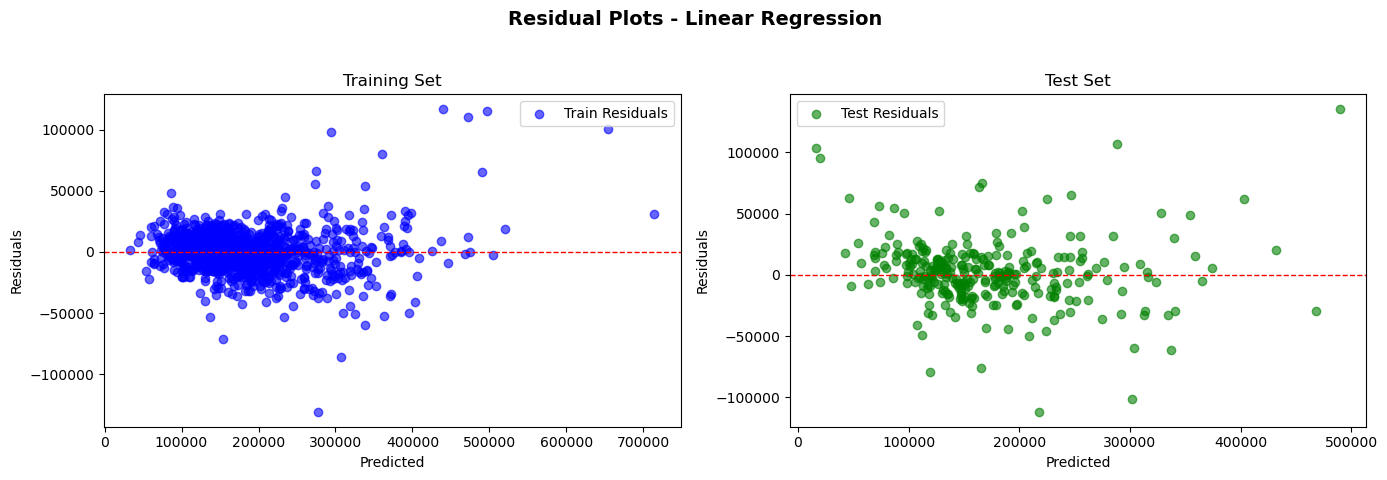

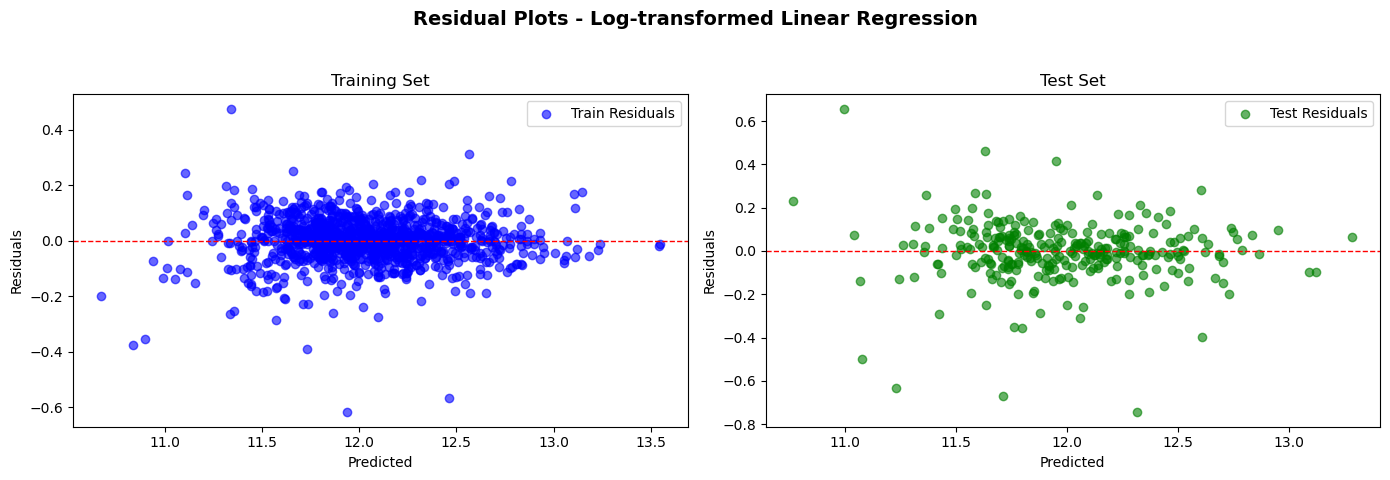

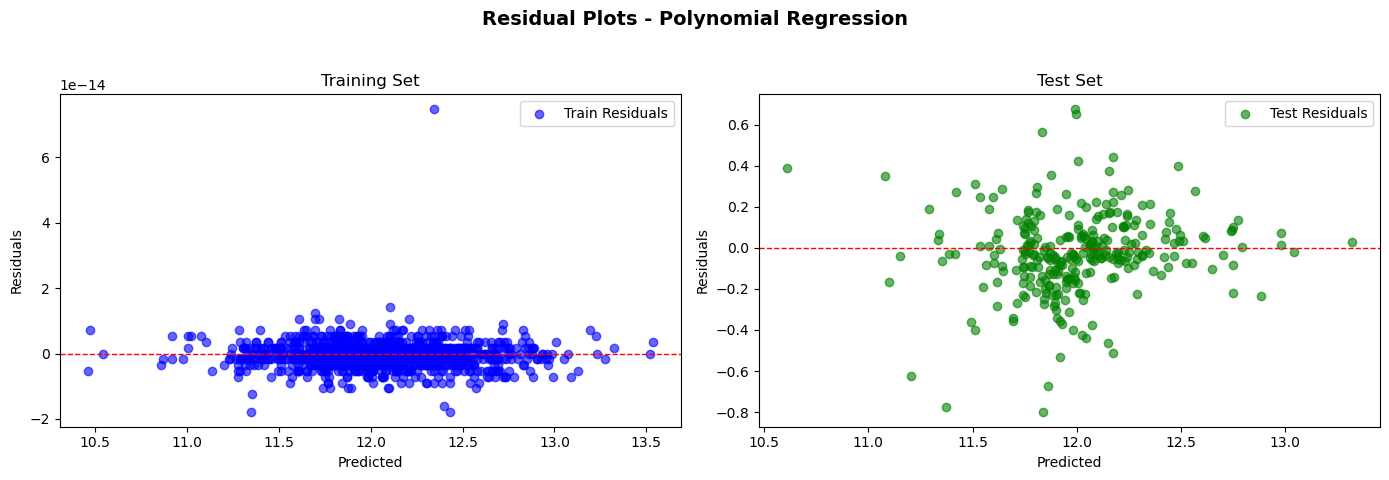

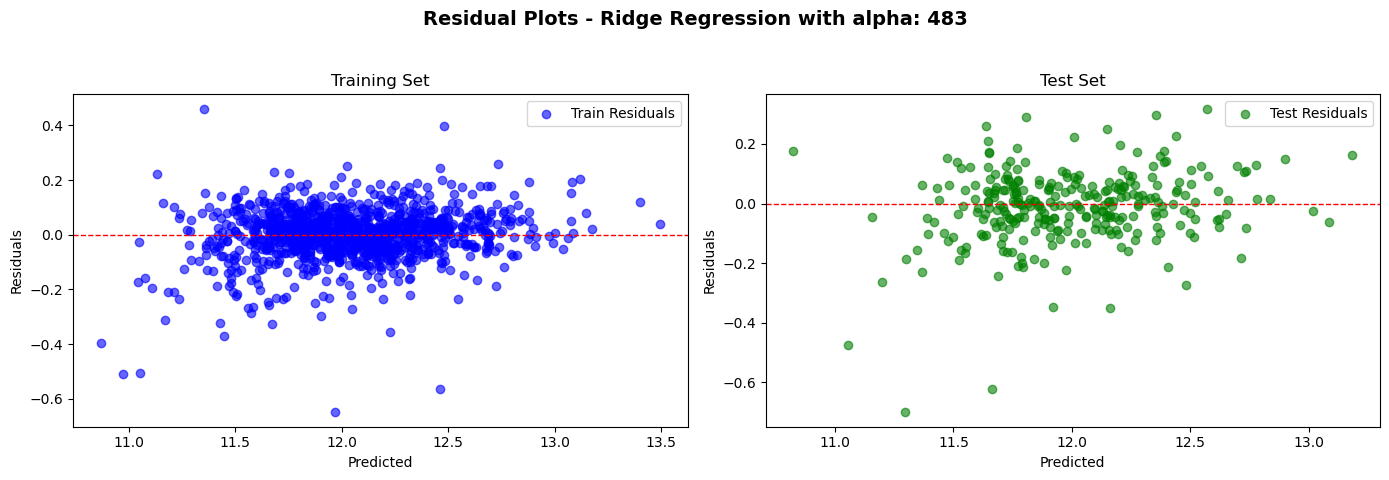

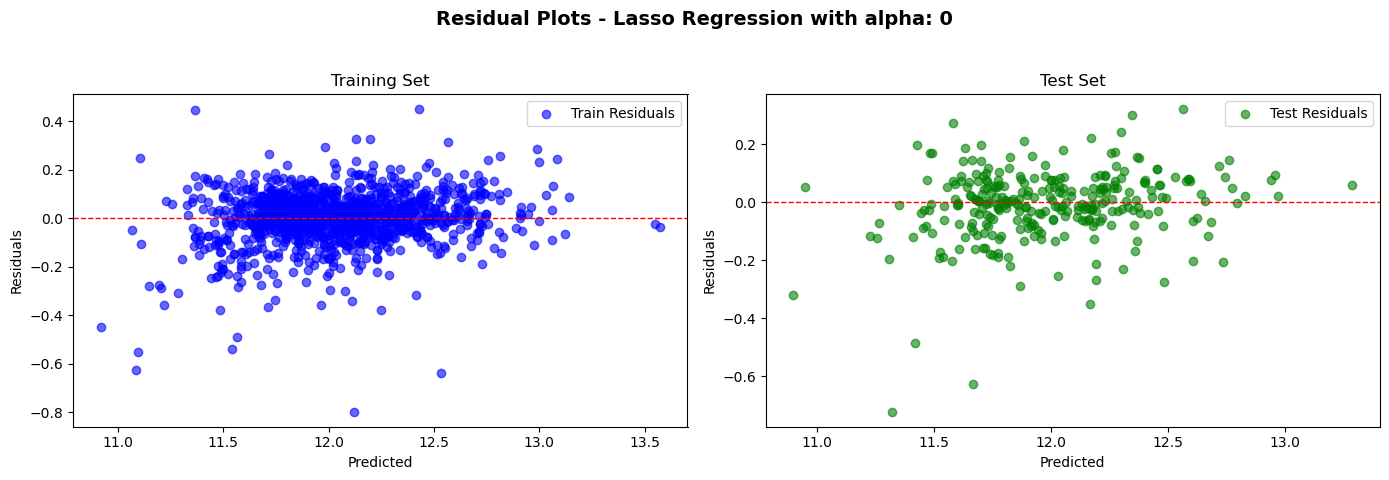

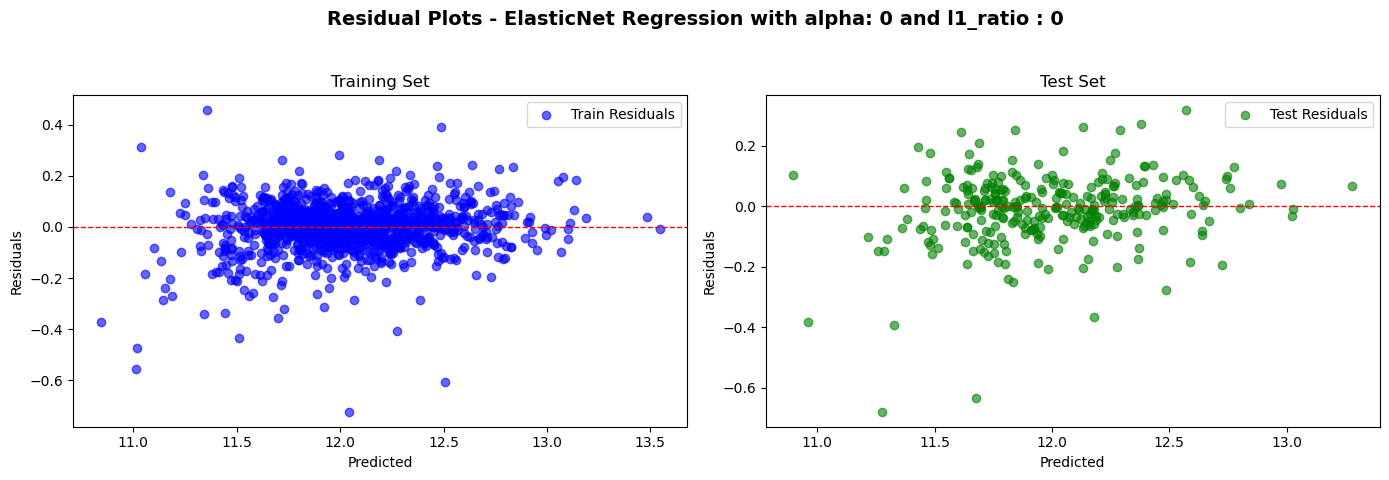

In [286]:
# Assuming results_no_grid is loaded and contains the necessary data
# We'll iterate through each algorithm and create side-by-side residual plots for Train and Test

# Group results by Algorithm Sequence
from collections import defaultdict

grouped_results = defaultdict(dict)
for result in results_no_grid:
    algo_seq = result['Algorithm Sequence']
    dataset = result['Dataset']
    grouped_results[algo_seq][dataset] = result

# Plot residuals for each algorithm
for algo_seq, data in grouped_results.items():
    train_result = data.get("Training Set")
    test_result = data.get("Test Set")
    
    if not train_result or not test_result:
        continue

    y_train_true = train_result["Y_True"]
    y_train_pred = train_result["Y_Pred"]
    train_residuals = train_result["Residuals"]

    y_test_true = test_result["Y_True"]
    y_test_pred = test_result["Y_Pred"]
    test_residuals = test_result["Residuals"]

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Residual Plots - {train_result['Algorithm Name']}", fontsize=14, fontweight='bold')

    axs[0].scatter(y_train_pred, train_residuals, alpha=0.6, color='blue', label='Train Residuals')
    axs[0].axhline(0, color='red', linestyle='--', linewidth=1)
    axs[0].set_title('Training Set')
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('Residuals')
    axs[0].legend()

    axs[1].scatter(y_test_pred, test_residuals, alpha=0.6, color='green', label='Test Residuals')
    axs[1].axhline(0, color='red', linestyle='--', linewidth=1)
    axs[1].set_title('Test Set')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Residuals')
    axs[1].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


<strong><u>Insights:</u></strong>

The residual plots shows decent randomness in Ridge, Lasso, ElasticNet.

##### <span style="color:blue; font-weight:bold;">Residual</span> 

#### **VII. Evaluation of Model Assumptions and Goodness of Fit**

##### <span style="color:blue; font-weight:bold;">Evaluation: Model Assumptions</span> 

In [287]:
summary_results_no_grid_results = []

for result in results_no_grid:
    summary = {
        "Algorithm Sequence": result["Algorithm Sequence"],
        "Algorithm Name": result["Algorithm Name"],
        "Dataset": result["Dataset"],
        "MSE": result["MSE"],
        "RMSE": result["RMSE"],
        "MAE": result["MAE"],
        "R²": result["R²"]
    }
    summary_results_no_grid_results.append(summary)

<strong><u>Insights:</u></strong>

💡 Final Summary:

| Model                             | Generalization | Likely to Satisfy Assumptions? | Notes                                 |
|----------------------------------|----------------|-------------------------------|---------------------------------------|
| Linear Regression                | ❌ Poor         | ⚠️ Violates Homoscedasticity   | Large test error jump                 |
| Log-Transformed Linear Regression| ✅ Good         | ✅ Yes                         | Good for skewed data                  |
| Polynomial Regression            | ❌ Overfit      | ❌ No (Generalization issue)   | Perfect train score = overfitting     |
| Ridge Regression                 | ✅ Good         | ✅ Yes                         | Strong balance                        |
| Lasso Regression                 | ✅ Good         | ✅ Yes                         | Feature selection benefit             |
| ElasticNet Regression            | ✅ Good         | ✅ Yes                         | Mix of Lasso + Ridge benefits         |



##### <span style="color:blue; font-weight:bold;">Evaluation: Goodness of Fit</span> 

In [288]:
# Assuming summary_results_no_grid_results is your list of dictionaries
summary_results_df = pd.DataFrame(summary_results_no_grid_results)

summary_results_df

,Algorithm Sequence,Algorithm Name,Dataset,MSE,RMSE,MAE,R²
0,1,Linear Regression,Training Set,3.027961e+08,1.740104e+04,1.186868e+04,0.952590
1,1,Linear Regression,Test Set,7.440336e+08,2.727698e+04,1.829773e+04,0.875386
2,2,Log-transformed Linear Regression,Training Set,6.647238e-03,8.153060e-02,5.754308e-02,0.957593
3,2,Log-transformed Linear Regression,Test Set,1.963624e-02,1.401294e-01,9.166503e-02,0.883069
4,3,Polynomial Regression,Training Set,1.773175e-29,4.210908e-15,2.760678e-15,1.000000
5,3,Polynomial Regression,Test Set,3.918875e-02,1.979615e-01,1.418053e-01,0.766636
6,4,Ridge Regression with alpha: 483,Training Set,8.479465e-03,9.208401e-02,6.524913e-02,0.945904
7,4,Ridge Regression with alpha: 483,Test Set,1.468092e-02,1.211648e-01,8.574720e-02,0.912577
8,5,Lasso Regression with alpha: 0,Training Set,1.193759e-02,1.092593e-01,7.725723e-02,0.923843
9,5,Lasso Regression with alpha: 0,Test Set,1.455263e-02,1.206343e-01,8.349211e-02,0.913341


<strong><u>Insights:</u></strong>


✅ Evaluation of Models:

| Algorithm | Dataset | R² | RMSE | MAE | Comments |
|----------|---------|----|------|-----|----------|
| **Linear Regression** | Train | 0.953 | 17,401 | 11,869 | Good fit on training set |
|                      | Test  | 0.875 | 27,277 | 18,298 | Fit deteriorates on test set — may underfit complex relationships |
| **Log-transformed Linear Regression** | Train | 0.958 | 0.0815 | 0.0575 | Excellent fit |
|                                 | Test  | 0.883 | 0.1401 | 0.0917 | Very stable — indicates great generalization |
| **Polynomial Regression** | Train | **1.000** | ~0 | ~0 | Overfit — perfect fit on training set |
|                           | Test  | 0.767 | 0.1980 | 0.142 | Sharp decline — poor generalization |
| **Ridge Regression (α=483)** | Train | 0.946 | 0.0921 | 0.0652 | Excellent fit |
|                             | Test  | 0.913 | 0.1212 | 0.0857 | Consistent performance — very good |
| **Lasso Regression (α=0)** | Train | 0.924 | 0.1093 | 0.0773 | Slightly worse than Ridge |
|                            | Test  | 0.913 | 0.1206 | 0.0835 | Still very solid — stable generalization |
| **ElasticNet (α=0, l1=0)** | Train | 0.940 | 0.0967 | 0.0683 | Similar to Ridge |
|                            | Test  | 0.921 | 0.1150 | 0.0788 | Best R² among all test models |



#### **VIII. Save Model for future prediction**

In [289]:
# Filter only test set results
test_results_df = summary_results_df[summary_results_df["Dataset"] == "Test Set"]

# Sort by R² in descending order
top_3_test_models = test_results_df.sort_values(by="R²", ascending=False).head(3)

# Top algorithm sequences based on test R²
top_algorithm_sequences = top_3_test_models['Algorithm Sequence'].tolist()

# Display the top 3 models
print(top_algorithm_sequences)

[6, 5, 4]


In [292]:
# Select models with matching Algorithm Sequence
best_models = [model for model in models_no_grid if model['Algorithm Sequence'] in top_algorithm_sequences]

In [293]:
best_models

[{'Algorithm Sequence': 4,
  'Algorithm Name': 'Ridge Regression with alpha: 483',
  'Algorithm': GridSearchCV(cv=5, estimator=Ridge(),
               param_grid={'alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
         1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
         3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
         6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
         1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])},
               scoring='neg_mean_squared_error', verbose=1),
  'Scaler': StandardScaler()},
 {'Algorithm Sequence': 5,
  'Algorithm Name': 'Lasso Regression with alpha: 0',
  'Algorithm': GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
               param_grid={'alpha': array([ 0.01      ,  0.01072267,  0.01149757,  0.01232847,  0.01321941,
          0.01417474,  0.01519911,  0.01629751,  0.01747528,  0.01873817,
          0.02009233,  0.02154435,  0.02

In [294]:
# Download model and scalar as pickle

import pickle

# Folder to store the models
model_output_folder = 'models'
model_output_dir = os.path.join(base_dir, model_output_folder)
os.makedirs(model_output_dir, exist_ok=True)

# Save each model and scaler
for model_info in best_models:
    algo_seq = model_info['Algorithm Sequence']
    algo_name = model_info['Algorithm Name']
    model = model_info['Algorithm']
    scaler = model_info['Scaler']

    # Clean filename
    clean_name = algo_name.replace(" ", "_").replace(":", "").replace("/", "")
    
    # Define file paths
    model_filename = f"model_{algo_seq}_{clean_name}.pkl"
    scaler_filename = f"scaler_{algo_seq}_{clean_name}.pkl"
    
    model_file_path = os.path.join(model_output_dir, model_filename)
    scaler_file_path = os.path.join(model_output_dir, scaler_filename)

    # Save model
    with open(model_file_path, 'wb') as f:
        pickle.dump(model, f)
    
    # Save scaler
    with open(scaler_file_path, 'wb') as f:
        pickle.dump(scaler, f)

    print(f"✅ Saved model to: {model_file_path}")
    print(f"✅ Saved scaler to: {scaler_file_path}")

✅ Saved model to: c:\Users\4553620\OneDrive - Northwestern University\Self_Projects\Data_Science_Projects\Housing Prices_Kaggle\models\model_4_Ridge_Regression_with_alpha_483.pkl
✅ Saved scaler to: c:\Users\4553620\OneDrive - Northwestern University\Self_Projects\Data_Science_Projects\Housing Prices_Kaggle\models\scaler_4_Ridge_Regression_with_alpha_483.pkl
✅ Saved model to: c:\Users\4553620\OneDrive - Northwestern University\Self_Projects\Data_Science_Projects\Housing Prices_Kaggle\models\model_5_Lasso_Regression_with_alpha_0.pkl
✅ Saved scaler to: c:\Users\4553620\OneDrive - Northwestern University\Self_Projects\Data_Science_Projects\Housing Prices_Kaggle\models\scaler_5_Lasso_Regression_with_alpha_0.pkl
✅ Saved model to: c:\Users\4553620\OneDrive - Northwestern University\Self_Projects\Data_Science_Projects\Housing Prices_Kaggle\models\model_6_ElasticNet_Regression_with_alpha_0_and_l1_ratio__0.pkl
✅ Saved scaler to: c:\Users\4553620\OneDrive - Northwestern University\Self_Projects\D